In [18]:
# Source : http://pbpython.com/effective-matplotlib.html

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [5]:
plt.style.available   

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [10]:
plt.style.use('ggplot')

In [12]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()

top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

C:\Users\lakj\AppData\Local\Temp\ipykernel_18012\752520263.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})


<Axes: ylabel='Name'>

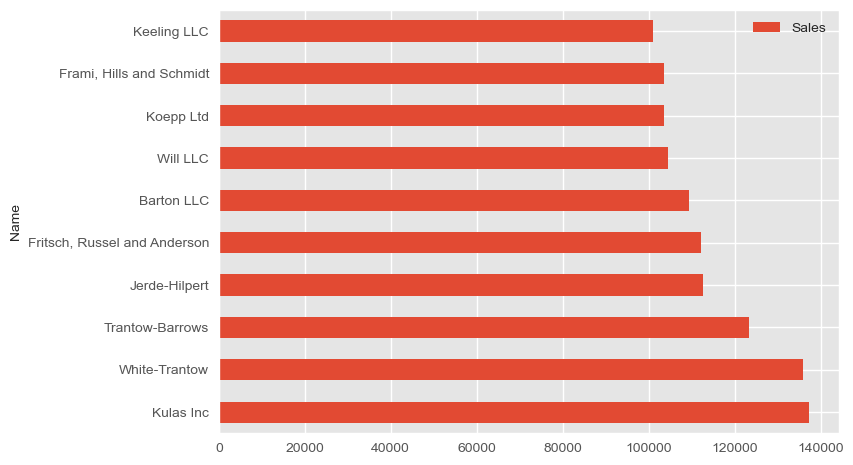

In [13]:
top_10.plot(kind='barh', y="Sales", x="Name")

<Axes: ylabel='Name'>

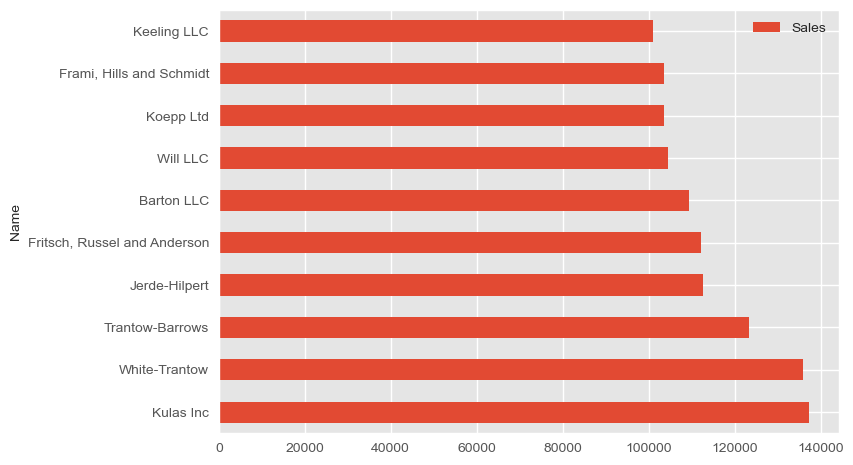

In [16]:
#Customizing the Plot
#Assuming you are comfortable with the gist of this plot, the next step is to customize it. 
#Some of the customizations (like adding titles and labels) are very simple to use with the pandas plot function. 
# However, you will probably find yourself needing to move outside of that functionality at some point. 
# That’s why I recommend getting in the habit of doing this:

fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)

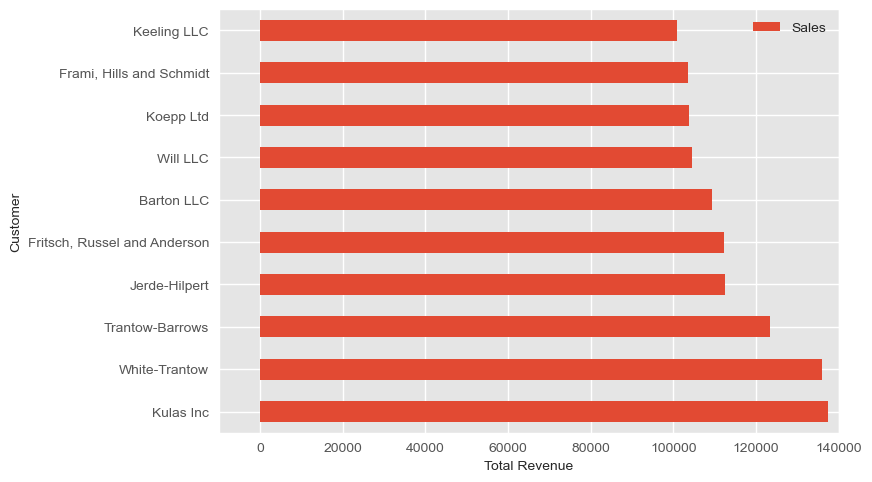

In [17]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

[Text(0.5, 1.0, '2014 Revenue'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0, 0.5, 'Customer')]

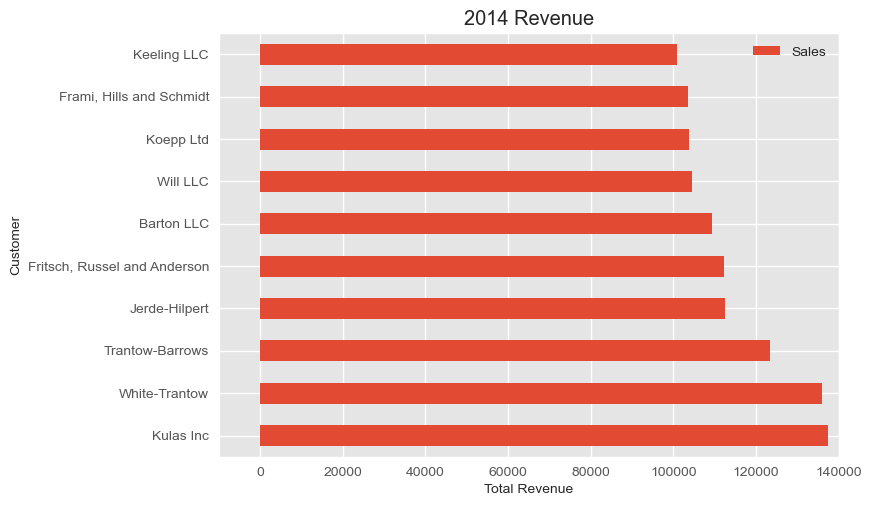

In [20]:
# Here’s another shortcut we can use to change the title and both labels:

fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

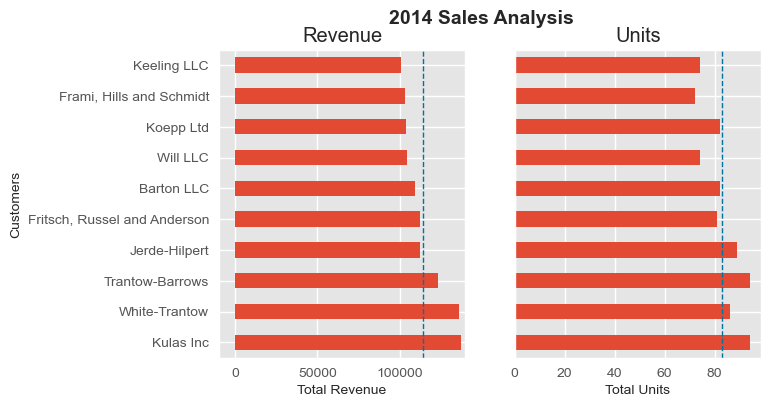

In [21]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

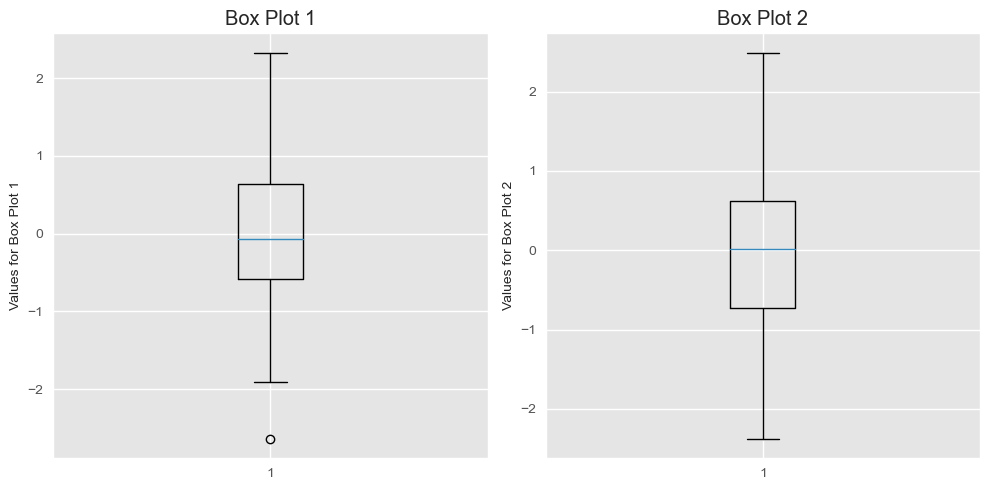

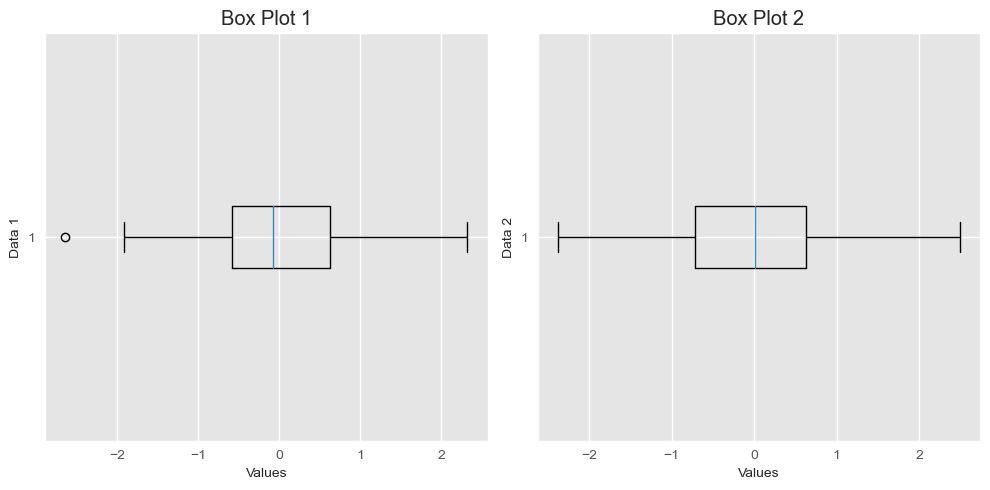

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample data for the box plots
data1 = np.random.randn(100)
data2 = np.random.randn(100)

# Create a figure and subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Create the first box plot in the first subplot
boxplot1 = axes[0].boxplot(data1)
axes[0].set_title('Box Plot 1')
axes[0].set_ylabel('Values for Box Plot 1')

# Create the second box plot in the second subplot
boxplot2 = axes[1].boxplot(data2)
axes[1].set_title('Box Plot 2')
axes[1].set_ylabel('Values for Box Plot 2')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Create box plots for the first subplot
boxplot1 = axes[0].boxplot(data1, vert=False)
axes[0].set_title('Box Plot 1')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Data 1')

# Create box plots for the second subplot
boxplot2 = axes[1].boxplot(data2, vert=False)
axes[1].set_title('Box Plot 2')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Data 2')

# Display the plots
plt.tight_layout()
plt.show()

In [15]:
# Get geodata

In [154]:
import pandas as pd
import geopandas as gpd


# Load JSON data into a DataFrame
geojson_file_path = r"C:\Users\lakj\Documents\GitHub\isds2023\cbk\municipalities.geojson"  
gdf = gpd.read_file(geojson_file_path)

# Get relevant data from the GeoDataFrame
geo_df = gdf[['lau_1', 'label_dk']].rename(columns = {'lau_1':'muni_code', 'label_dk':'muni_name'})

gini_df = pd.read_csv(r'C:\Users\lakj\Documents\GitHub\isds2023\Feature_data\gini_index.csv')


# Convert 'muni_code' column to string in both DataFrames
geo_df['muni_code'] = geo_df['muni_code'].astype(str)
gini_df['muni_code'] = gini_df['muni_code'].astype(str)


# Merge the DataFrames based on 'muni_code'
merged_df = geo_df.merge(gini_df, on='muni_code')

# Subset
muni_gini = merged_df[['muni_name', 'year', 'gini_index']]

year = 1992
muni = 'Hedensted'
muni_gini = muni_gini[muni_gini['year'] == year].reset_index(drop=True)
#muni_gini = muni_gini[muni_gini['muni_name'] == muni].reset_index(drop=True)

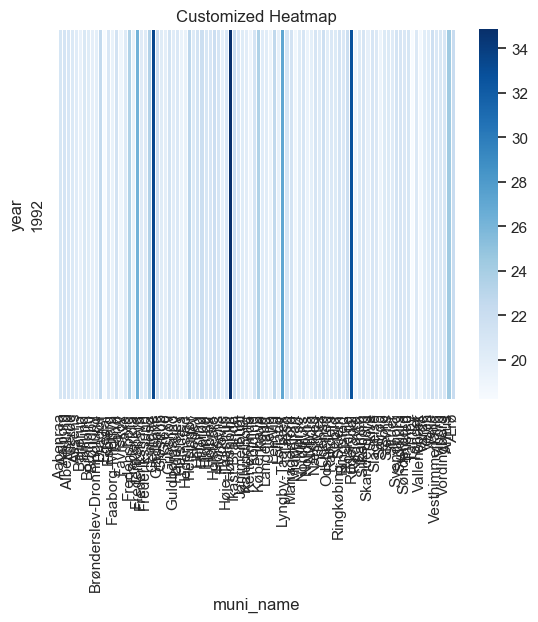

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = muni_gini.pivot_table(index='year', columns='muni_name', values='gini_index')

# Create the heatmap
sns.heatmap(heatmap_data,
            cmap='Blues',
            annot=False,
            fmt='.2f',
            linewidths=0.5,
            annot_kws={"size": 10},
            xticklabels=True,
            yticklabels=True)

plt.title('Customized Heatmap')
plt.show()

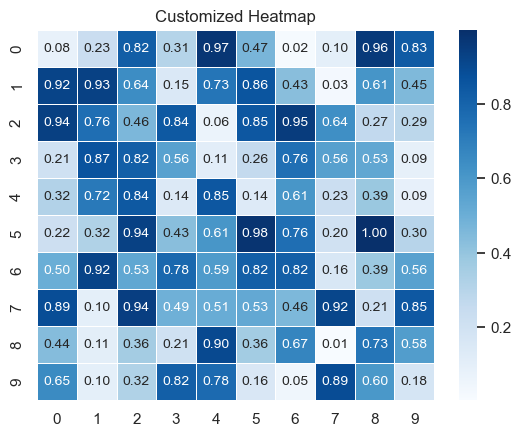

In [164]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(10, 10)  # Replace with your own data

# Create the heatmap
sns.heatmap(data,
            cmap='Blues',
            annot=True,
            fmt='.2f',
            linewidths=0.5,
            annot_kws={"size": 10},
            xticklabels=True,
            yticklabels=True)

plt.title('Customized Heatmap')  # Set the title using plt.title()
plt.show()


In [157]:
data

array([[0.72180897, 0.83282334, 0.06798231, 0.3104342 , 0.96726522,
        0.56209852, 0.52463164, 0.24230627, 0.71009667, 0.76355116],
       [0.60443862, 0.37036337, 0.07072952, 0.71950762, 0.17623431,
        0.79343026, 0.6850421 , 0.72199414, 0.14798746, 0.2939194 ],
       [0.55939667, 0.59671409, 0.95711184, 0.36398153, 0.01338606,
        0.1927085 , 0.22599521, 0.94207626, 0.79811032, 0.0522122 ],
       [0.07325556, 0.86445944, 0.6127778 , 0.55922121, 0.73777512,
        0.24593149, 0.9384016 , 0.46957714, 0.05873007, 0.57501511],
       [0.31313088, 0.89598463, 0.79989652, 0.91407507, 0.53445155,
        0.48461078, 0.39300397, 0.2869044 , 0.99741453, 0.91323535],
       [0.3669311 , 0.25916791, 0.46396649, 0.7021765 , 0.76882721,
        0.24499233, 0.5626464 , 0.36827106, 0.11436905, 0.88645329],
       [0.87910144, 0.81207339, 0.75414964, 0.26820791, 0.4748892 ,
        0.12655141, 0.01884042, 0.31333774, 0.11962933, 0.03170298],
       [0.59165834, 0.91338189, 0.0364784

In [ ]:
import pandas as pd
import geopandas as gpd

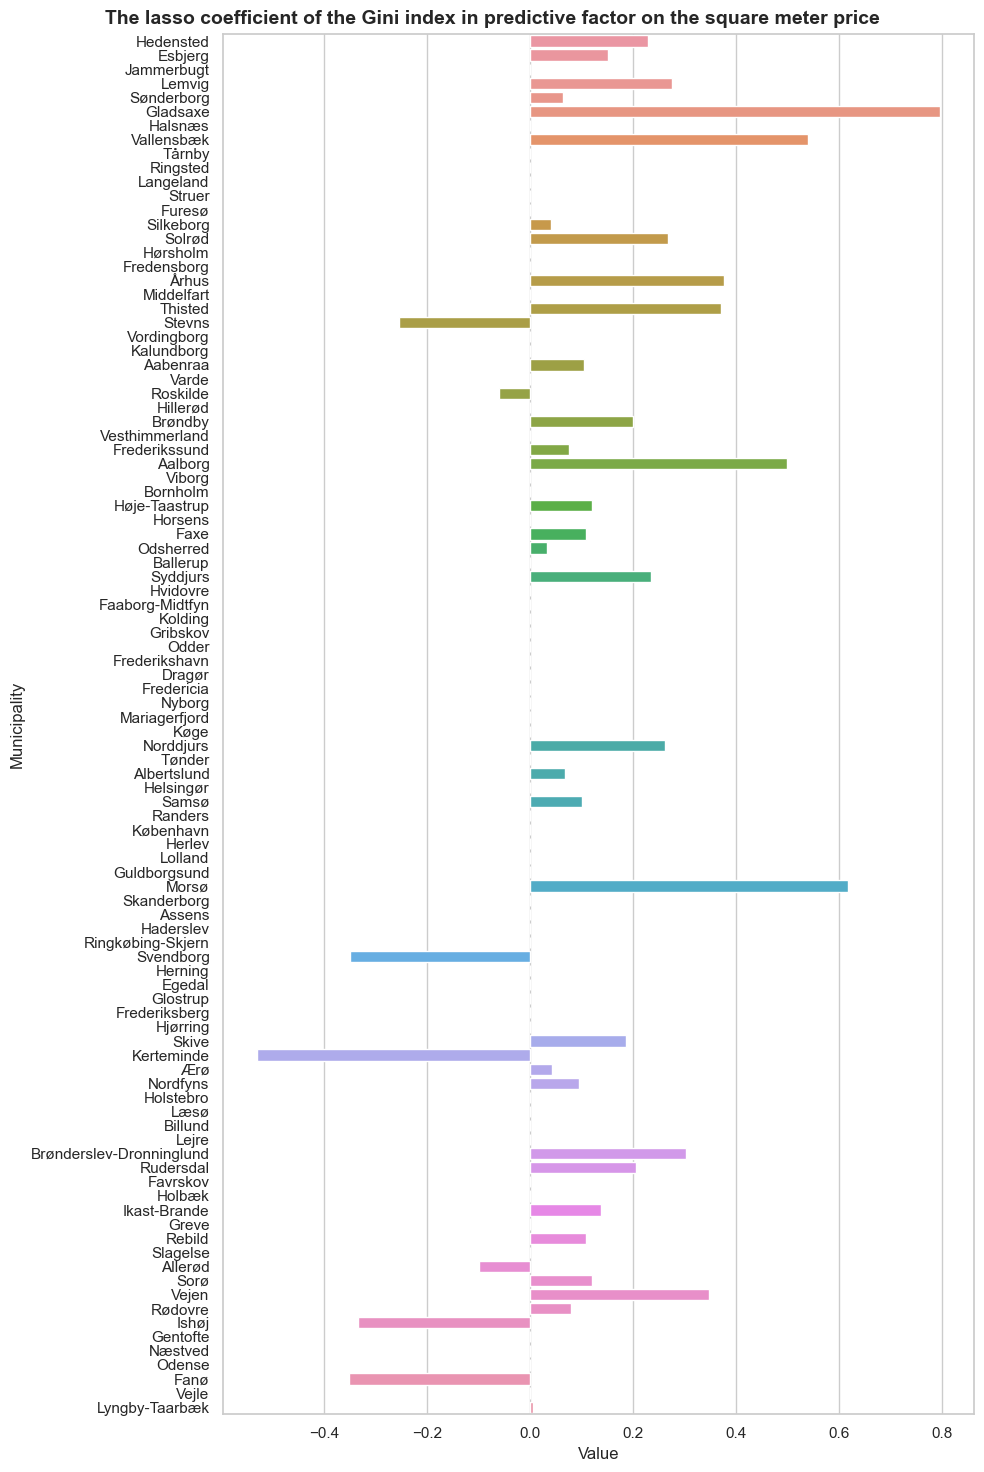

In [245]:
# Load parameter data
df = pd.read_csv(r'C:\Users\lakj\Documents\GitHub\isds2023\cbk\fitted_models\coefficients_lasso.csv')
parameter = 'gini_index'
df_coefficients = df[df['parameter'] == parameter].iloc[:, [1,3]]

# Load geo data into a DataFrame
geojson_file_path = r"C:\Users\lakj\Documents\GitHub\isds2023\cbk\municipalities.geojson"  
gdf = gpd.read_file(geojson_file_path)
# Get relevant data from the GeoDataFrame
geo_df = gdf[['lau_1', 'label_dk']].rename(columns = {'lau_1':'muni_code', 'label_dk':'muni_name'})
geo_df

# Convert 'muni_code' column to string in both DataFrames
geo_df['muni_code'] = geo_df['muni_code'].astype(str)
df_coefficients['muni_code'] = df_coefficients['muni_code'].astype(str)


# Merge the DataFrames based on 'muni_code' and subset
merged_df = geo_df.merge(df_coefficients, on='muni_code')
merged_df= merged_df[['muni_name', 'value']]

# Create a figure and subplots with two columns
fig, ax = plt.subplots(figsize=(10, 15))

# Create the bar plot using sns.barplot
ax = sns.barplot(x='value', y='muni_name', data=merged_df)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Municipality')

# Title the figure
fig.suptitle('The lasso coefficient of the Gini index in predictive factor on the square meter price', fontsize=14, fontweight='bold');

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

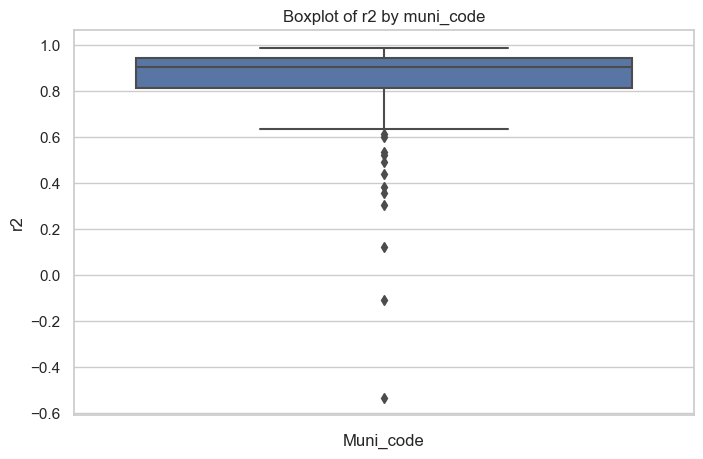

In [259]:
df = pd.read_csv(r'C:\Users\lakj\Documents\GitHub\isds2023\cbk\fitted_models\metrics_lasso.csv')
# Group data by 'muni_code' and calculate statistics
#grouped = df.groupby('muni_code')['r2']

# Create a boxplot using seaborn
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(8, 5))  # Set the figure size

ax = sns.boxplot(y='r2', data=df)

# Add labels and title
plt.xlabel('Muni_code')
plt.ylabel('r2')
plt.title('Boxplot of r2 by muni_code')

plt.show()

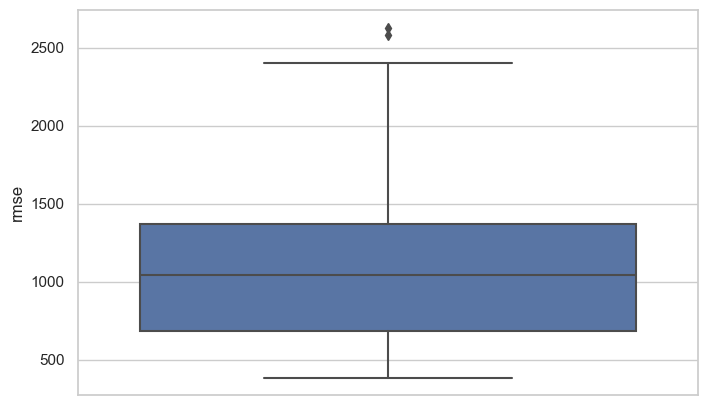

In [262]:
df = pd.read_csv(r'C:\Users\lakj\Documents\GitHub\isds2023\cbk\fitted_models\metrics_lasso.csv')
# Group data by 'muni_code' and calculate statistics
#grouped = df.groupby('muni_code')['r2']

# Create a boxplot using seaborn
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(8, 5))  # Set the figure size

ax = sns.boxplot(y='rmse', data=df)

# Add labels and title
#plt.xlabel('Muni_code')
#plt.ylabel('r2')
#plt.title('Boxplot of r2 by muni_code')

plt.show()

In [268]:
df.sort_values('r2', ascending=False)

,Unnamed: 0,muni_code,rmse,r2
97,97,101,1248.485683,0.987695
84,84,175,1070.479821,0.979803
89,89,163,1056.230403,0.974306
87,87,167,1157.957320,0.972144
71,71,253,1027.954709,0.969661
...,...,...,...,...
18,18,741,2054.924940,0.358061
5,5,825,2041.413110,0.301876
12,12,773,1259.826262,0.120854
36,36,563,2628.813808,-0.106812


In [276]:
df_m_lasso.head(2)

,Unnamed: 0,muni_code,rmse,r2
0,0,860,542.898762,0.868364
1,1,851,943.782470,0.938444


In [285]:
gdf.head(20)

,lau_1,label_en,label_dk,iso_3166_2,geometry
0,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((9.44919 55.86046 -999.00000, 9.460..."
1,766,Hedensted,Hedensted,DK-82,"POLYGON Z ((10.06198 55.83301 -999.00000, 10.0..."
2,561,Esbjerg,Esbjerg,DK-83,"POLYGON Z ((8.59656 55.53506 -999.00000, 8.601..."
3,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((9.78314 57.07319 -999.00000, 9.781..."
4,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((9.19738 57.13868 -999.00000, 9.207..."
5,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((9.14551 57.03228 -999.00000, 9.144..."
6,849,Jammerbugt,Jammerbugt,DK-81,"POLYGON Z ((9.49285 57.03007 -999.00000, 9.493..."
7,665,Lemvig,Lemvig,DK-82,"POLYGON Z ((8.11941 56.54235 -999.00000, 8.120..."
8,665,Lemvig,Lemvig,DK-82,"POLYGON Z ((8.13443 56.38449 -999.00000, 8.134..."
9,540,Sønderborg,Sønderborg,DK-83,"POLYGON Z ((9.56771 54.95265 -999.00000, 9.583..."


In [389]:
from pathlib import Path
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [385]:
# Load parameter data
input_path = Path.cwd() / 'ml_data/fitted_models' # path of files to be found
parameter_data = pd.read_csv(input_path / 'all_metrics_lasso_year.csv')


# Load municipality data
muni_codes = pd.read_csv('municipality_number_codes.csv', sep=';', names=['muni_name', 'muni_code'] )


# Merge the parameter and the geo data 

merged_df = municode.merge(parameter_data, on='muni_code')
merged_df = merged_df.loc[:, ['muni_code', 'muni_name', 'rmse', 'r2']]


# get data on numbers of sales 
inlier_data_path = Path.cwd() / 'Boliga data/inlier_data/'
files = os.listdir(inlier_data_path)
dfs =  []
for i in files:
    df = pd.read_csv(inlier_data_path/i, low_memory=False)
    dfs.append(df)
    
    
# concat dataframes, wrangle, send back to new dataframe, and merge into 'merged_df' 
new_df = pd.concat(dfs)
new_df = new_df['municipality'].value_counts().to_frame().reset_index().rename(columns = {'index' : 'muni_code', 'municipality': 'sum_sale'})

merged_df = merged_df.merge(new_df, on='muni_code', how='left')

In [386]:
# Calculate summary statistics using describe()
summary_stats = merged_df['r2'].describe()

# Extract quartile values from the summary statistics
q1 = summary_stats['25%']
q2 = summary_stats['50%']
q3 = summary_stats['75%']

# Create a function to assign quartile labels
def assign_quartile(value):
    if value <= q1:
        return 'q1'
    elif value <= q2:
        return 'q2'
    elif value <= q3:
        return 'q3'
    else:
        return 'q4'

# Add quartile labels column to the DataFrame
merged_df['quartiles'] = merged_df['r2'].apply(assign_quartile)

# sort value 'r2'
sort_merged_data = merged_df.sort_values('r2')

# subset q4 
sort_merged_data_q4 = sort_merged_data[sort_merged_data['quartiles'] == 'q4']

sort_merged_data_q4.sort_values('r2', ascending=False).head(10) 

,muni_code,muni_name,rmse,r2,sum_sale,quartiles
61,540,Sønderborg,749.757401,0.765765,29049,q4
7,210,Fredensborg,1672.799456,0.758293,20743,q4
80,740,Silkeborg,1495.708708,0.713288,40423,q4
20,169,Høje-Taastrup,1517.928656,0.670000,25541,q4
48,561,Esbjerg,1134.650033,0.613060,48803,q4
97,851,Aalborg,1595.826314,0.553580,93744,q4
14,270,Gribskov,1565.234975,0.543134,19334,q4
86,751,Aarhus,3231.229546,0.484489,138594,q4
82,779,Skive,746.431245,0.466836,19750,q4
52,510,Haderslev,987.349375,0.462348,22389,q4


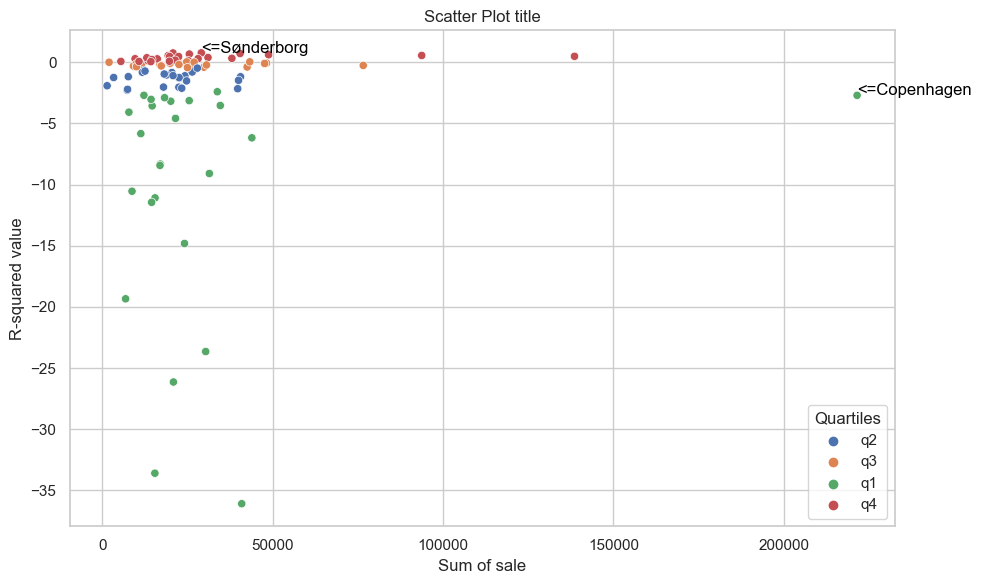

In [438]:
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

sns.scatterplot(data = merged_df, x='sum_sale', y='r2', hue='quartiles')

# Customize title and labels
plt.title('Scatter Plot title')
plt.xlabel('Sum of sale')
plt.ylabel('R-squared value')

# Customize spines
#sns.despine(left=True, bottom=True)

# Add text annotation
x_val_cph = merged_df[merged_df['muni_name'] == 'København']['sum_sale']
y_val_cph = merged_df[merged_df['muni_name'] == 'København']['r2']
plt.text(x_val_cph, y_val_cph, '<=Copenhagen', fontsize=12, color='black')

# Add text annotation
x_val_sonder = merged_df[merged_df['muni_name'] == 'Sønderborg']['sum_sale']
y_val_sonder = merged_df[merged_df['muni_name'] == 'Sønderborg']['r2']
plt.text(x_val_sonder, y_val_sonder, '<=Sønderborg', fontsize=12, color='black')

# Move the legend
plt.legend(title='Quartiles', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='sum_sale', ylabel='r2'>

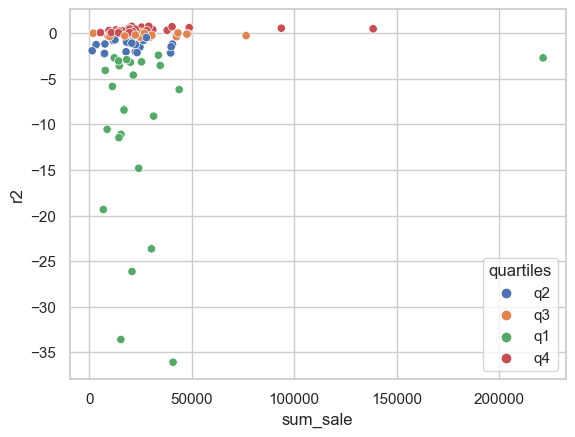

In [388]:
# import matplotlib.pyplot as plt

sns.scatterplot(data = merged_df, x='sum_sale', y='r2', hue='quartiles')
#plt.yscale('log')